In [4]:
import xarray as xr
import numpy as np
import os 
import hvplot.xarray
import cartopy.crs as crs
import holoviews as hv
from holoviews import opts
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("/home/nma/HDD/vinay/archives/finals/360_2013_final/")
out_fol = "/home/nma/Documents/"

In [5]:
sfc = xr.open_dataset("20130101.ocean_sfc.nc")

time_indices = sfc.indexes["time"].to_datetimeindex()

dates_n = time_indices.where(time_indices.day == 15)


indices = [idx for idx, element in enumerate(dates_n) if type(element) != type(dates_n[0])]



/tmp/ipykernel_1097995/1784897623.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time_indices = sfc.indexes["time"].to_datetimeindex()


### static plots

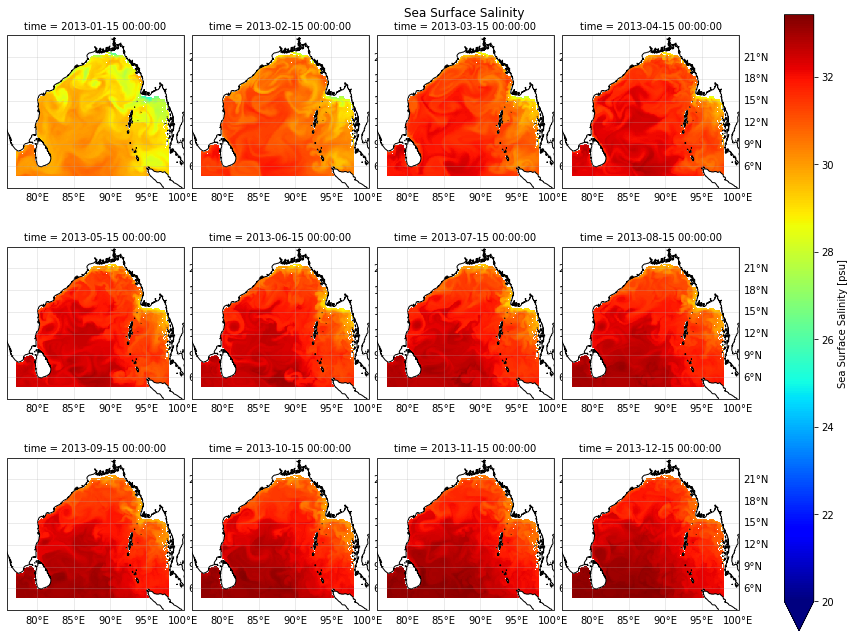

In [39]:

sst = sfc.SSS[indices,:,:].plot(col="time",
                          col_wrap=4,cmap="jet",
                          transform=crs.PlateCarree(),
                          subplot_kws={"projection": crs.PlateCarree()},
                                vmax=np.nanmax(sfc.SSS[indices,:,:].values),vmin=20)
ct = 0
for ax in sst.axes.flat:
    ct = ct +1 
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    gl = ax.gridlines(draw_labels=True,alpha=0.3)
    gl.xlabels_top = False
    gl.ylabels_left = False

plt.suptitle("Sea Surface Salinity")
plt.savefig(out_fol+"SSS.png",dpi=250)

In [2]:

#fc.SST[indices,:,:].plot(col="time",col_wrap=4)

#fc.SST[0,:,:].hvplot.contour(levels=20) + sfc.SST[0,:,:].hvplot.contourf(levels=8)

#sfc.SST[indices,:,:].hvplot(groupby='time', width=600, widget_type='scrubber', widget_location='bottom')

proj = crs.PlateCarree()
plot = sfc.SST[indices,:,:].hvplot.quadmesh(
    'xh', 'yh', projection=proj, project=True, global_extent=False, 
    cmap='gnuplot', rasterize=True, dynamic=False, coastline=True, 
    frame_width=500,geo=True,tiles='EsriNatGeo')

hvplot.show(plot)

/tmp/ipykernel_1184376/2207157931.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time_indices = sfc.indexes["time"].to_datetimeindex()


Launching server at http://localhost:37419


In [58]:
sfc['time'] = pd.date_range("2013-01-02", periods=360)

curr = np.sqrt(((sfc.SSU[indices,:,:].values[:,:,:-1])**2)+((sfc.SSV[indices,:,:].values)[:,:-1,:]**2))

#sfc_sub = sfc.isel(time=indices)

#sfc_sub["current"] = (('time', 'xh','yq'), sfc_sub)

plot = sfc.speed[indices,:,:].hvplot.contourf(x='xh', y='yh',geo=True, 
                                     tiles='StamenTerrainRetina', 
                                     levels=100, cmap='jet') + sfc.speed[indices,:,:].hvplot.contour(x='xh', 
                                                                                                   y='yh',geo=True, 
                                                                                                   tiles='StamenTerrainRetina',
                                                                                                   levels=100, cmap='jet',)

plot.opts(opts.Overlay(title='Sea surface speed'))
hvplot.save(plot,filename=out_fol+"speed_ig.html")

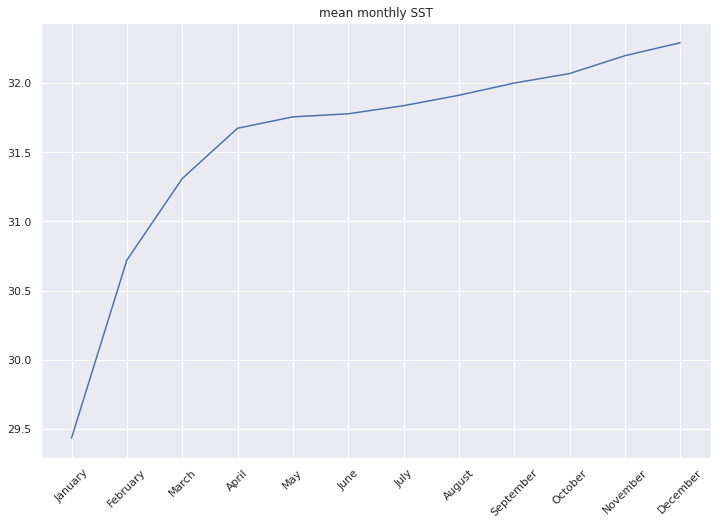

In [38]:
import seaborn as sbs 

mean_SST= sfc.SSS[indices,:,:].groupby("time")

sbs.set_theme(style="darkgrid")

fig,ax=plt.subplots(figsize=(12,8))
mST = mean_SST.mean(...)
months = pd.date_range("2013-01", periods=12,freq='M')
mon = months.month_name()
plt.plot(mon,mST)
plt.title("mean monthly SST")
plt.xticks(rotation='45')
#plt.savefig(out_fol+"sst_mean.png")


In [51]:
bob = xr.open_dataset("/home/nma/mom/MOM6dev/exps/regional2/INPUT//bob_grid.nc")

xx = np.unique(bob.x.values)
yy = np.unique(bob.y.values)

xx[0]-xx[1]
yy[0]-yy[1]

-0.04947916666666696